In [2]:
import os
from datetime import datetime
from pathlib import Path
from Marker import Marker
from constants import *
import mne
import offline_training
import numpy as np
import matplotlib.pyplot as plt

pygame 2.1.0 (SDL 2.0.16, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [17]:
raw_file='./recordings/try/raw.fif'
raw = mne.io.read_raw_fif(raw_file)
print(raw)

Opening raw data file ./recordings/try/raw.fif...
Isotrak not found
    Range : 0 ... 3558 =      0.000 ...    28.464 secs
Ready.
<Raw | raw.fif, 17 x 3559 (28.5 s), ~23 kB, data not loaded>


In [45]:
print(raw.info['ch_names'])

['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4', 'Stim Markers']


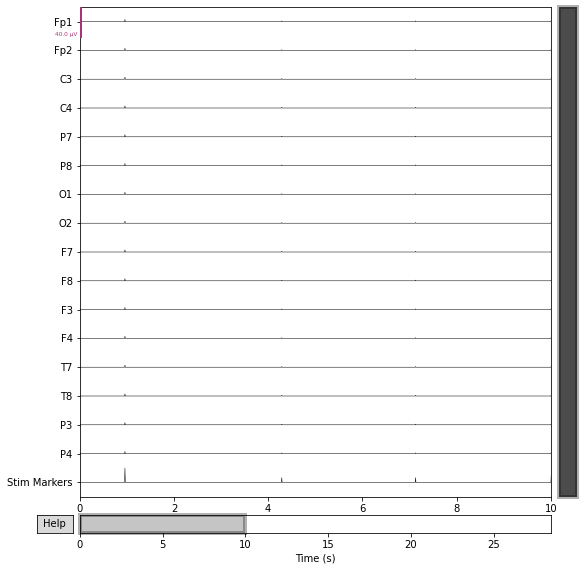

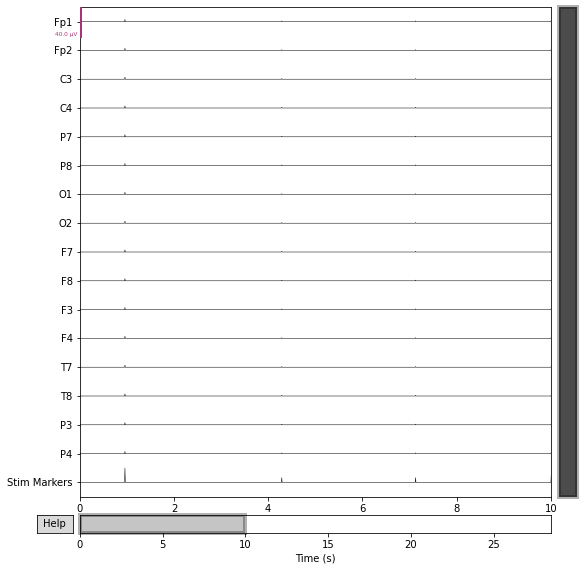

In [19]:
raw.plot()

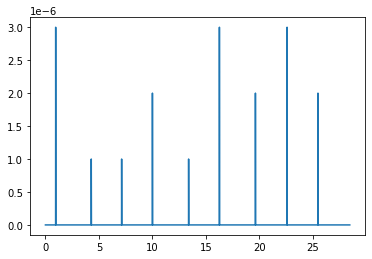

In [24]:
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 30])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y)

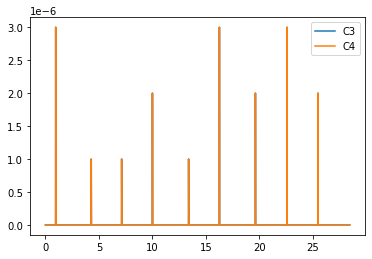

In [25]:
channel_names = ['C3', 'C4']
two_meg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

In [14]:
raw = mne.io.read_raw_fif(raw_file,preload=True )

Opening raw data file ./recordings/2021-12-14--09-41-06_gab/raw.fif...
Isotrak not found
    Range : 0 ... 6854 =      0.000 ...    27.416 secs
Ready.
Reading 0 ... 6854  =      0.000 ...    27.416 secs...


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import compute_proj_ecg
from mne_connectivity import envelope_correlation

sample_data_raw_file = './recordings/try/raw.fif'

raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file ./recordings/try/raw.fif...
Isotrak not found
    Range : 0 ... 3558 =      0.000 ...    28.464 secs
Ready.


In [34]:
raw.crop(tmax=28).resample(100)
ecg_proj, _ = compute_proj_ecg(raw, ch_name='C3')  # No ECG chan
raw.add_proj(ecg_proj)
raw.apply_proj()

9 events found
Event IDs: [1 2 3]
9 events found
Event IDs: [1 2 3]
Including 0 SSP projectors from raw file
Running ECG SSP computation
Using channel C3 to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 1000 samples (10.000 sec)

Number of ECG events detected : 9 (average pulse 19 / min.)
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwi

<Raw | raw.fif, 17 x 2801 (28.0 s), ~397 kB, data loaded>

In [36]:
epochs = mne.make_fixed_length_epochs(raw, duration=2, preload=False)

Not setting metadata
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


Loading data for 14 events and 200 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


/var/folders/bq/yr2g0hqx0vqcpvr3lgf609sh0000gn/T/ipykernel_54584/1137021597.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  event_related_plot = epochs.plot_image(picks=['C3'])


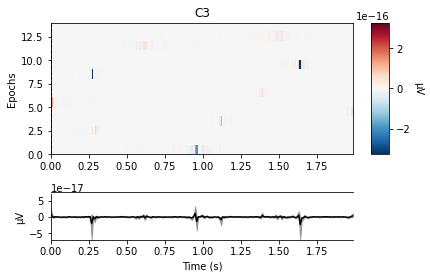

In [38]:
event_related_plot = epochs.plot_image(picks=['C3'])

In [55]:
epochs2=mne.read_epochs('./recordings/2021-12-14--13-50-05_gab1/-epo.fif')

Reading /Users/gab/Documents/GitHub/BCI4ALS-python/recordings/2021-12-14--13-50-05_gab1/-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated


In [56]:
print(epochs2.event_id)

{'1': 1, '2': 2, '3': 3}


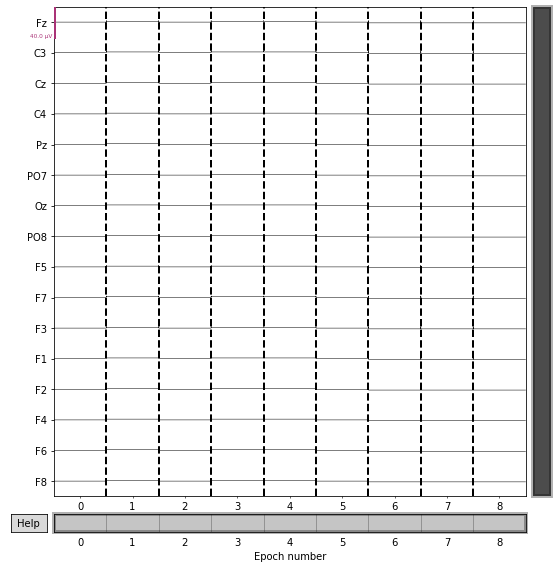

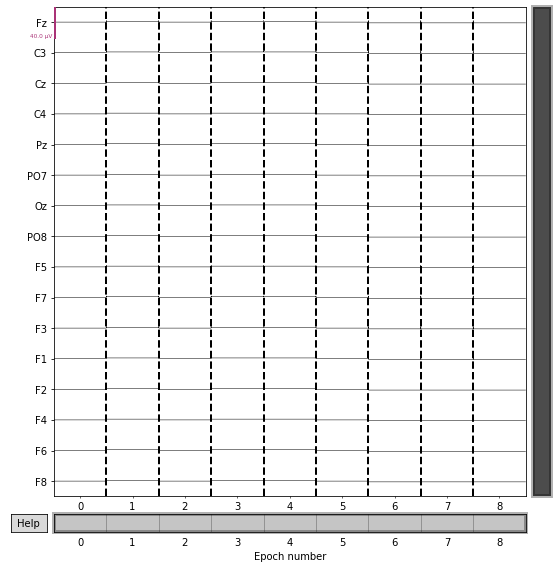

In [58]:
epochs2.plot(n_epochs=9)

In [18]:
raw_file='./recordings/2021-12-19--10-05-18_0088/raw.fif'
raw = mne.io.read_raw_fif(raw_file,preload=True )

Opening raw data file ./recordings/2021-12-19--10-05-18_0088/raw.fif...
Isotrak not found
    Range : 0 ... 22494 =      0.000 ...   179.952 secs
Ready.
Reading 0 ... 22494  =      0.000 ...   179.952 secs...


In [40]:
raw.info['ch_names']

['Fp1',
 'Fp2',
 'C3',
 'C4',
 'P7',
 'P8',
 'O1',
 'O2',
 'F7',
 'F8',
 'F3',
 'F4',
 'T7',
 'T8',
 'P3',
 'P4',
 'Stim Markers']

Effective window size : 16.384 (s)


/var/folders/bq/yr2g0hqx0vqcpvr3lgf609sh0000gn/T/ipykernel_24901/2231872650.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mne.viz.plot_raw_psd(raw)


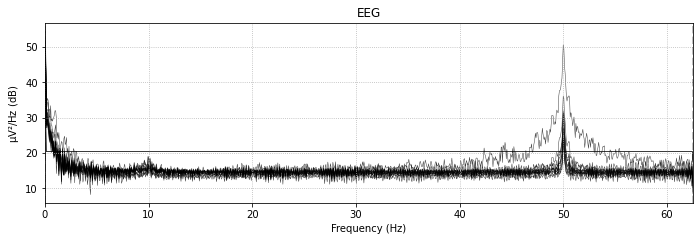

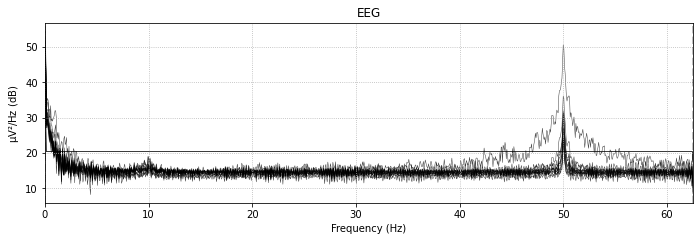

In [20]:
mne.viz.plot_raw_psd(raw)

In [31]:
raw = mne.io.read_raw_fif(raw_file)
raw = raw.pick_types(meg=False, eeg=True, eog=True, ecg=True, stim=True,
                     exclude=raw.info['bads']).load_data()
events = mne.find_events(raw)
raw.set_eeg_reference(projection=True).apply_proj()

Opening raw data file ./recordings/2021-12-19--10-05-18_0088/raw.fif...
Isotrak not found
    Range : 0 ... 22494 =      0.000 ...   179.952 secs
Ready.
Reading 0 ... 22494  =      0.000 ...   179.952 secs...
30 events found
Event IDs: [1 2 3]
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<Raw | raw.fif, 17 x 22495 (180.0 s), ~2.9 MB, data loaded>

In [22]:
epo_file='./recordings/2021-12-19--10-05-18_0088/-epo.fif'
epoch= mne.read_epochs(epo_file)

Reading /Users/gab/Documents/GitHub/BCI4ALS-python/recordings/2021-12-19--10-05-18_0088/-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


/var/folders/bq/yr2g0hqx0vqcpvr3lgf609sh0000gn/T/ipykernel_24901/139743318.py:1: UserWarning: Infinite value in PSD for channels T8, P3, P4.
These channels might be dead.
  epoch.plot_psd(fmin=2, fmax=30)
/var/folders/bq/yr2g0hqx0vqcpvr3lgf609sh0000gn/T/ipykernel_24901/139743318.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epoch.plot_psd(fmin=2, fmax=30)


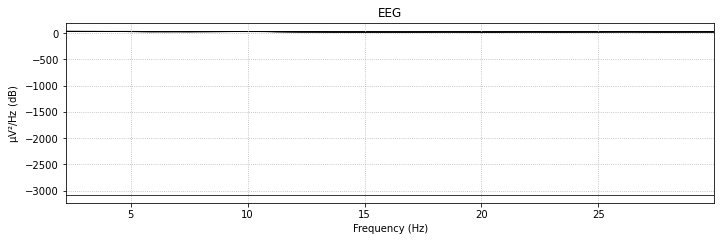

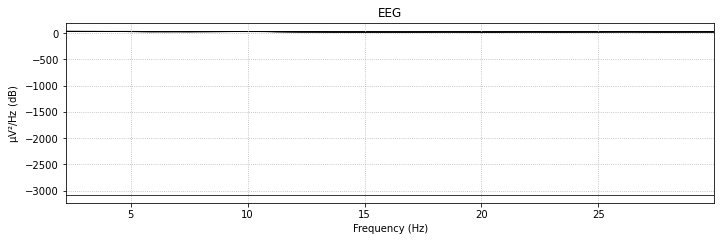

In [12]:
epoch.plot_psd(fmin=2, fmax=30)

In [37]:
epoch

Number of events,30
Events,1: 102: 103: 10
Time range,0.000 – 4.000 sec
Baseline,0.000 – 0.000 sec


In [33]:
import numpy as np
from matplotlib import pyplot as plt

from mne import create_info, EpochsArray
from mne.baseline import rescale
from mne.time_frequency import (tfr_multitaper, tfr_stockwell, tfr_morlet,
                                tfr_array_morlet)
from mne.viz import centers_to_edges

print(__doc__)

Automatically created module for IPython interactive environment


Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Need more than one channel to make topography for grad. Disabling interactivity.


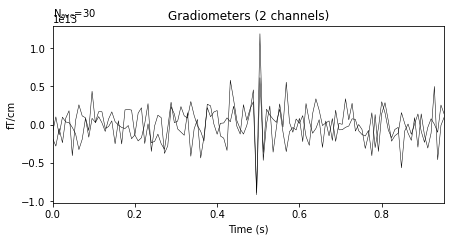

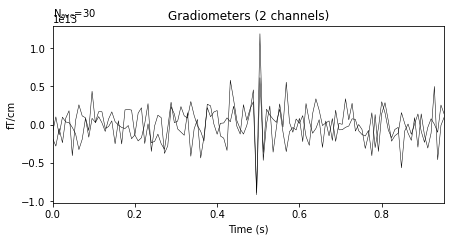

In [44]:
sfreq = 125.0
ch_names = ['C3', 'C4']
ch_types = ['grad', 'grad']
info = create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

n_times = 120  # Just over 1 second epochs
n_epochs = 30
seed = 42
rng = np.random.RandomState(seed)
noise = rng.randn(n_epochs, len(ch_names), n_times)

# Add a 50 Hz sinusoidal burst to the noise and ramp it.
t = np.arange(n_times, dtype=np.float64) / sfreq
signal = np.sin(np.pi * 2. * 50. * t)  # 50 Hz sinusoid signal
signal[np.logical_or(t < 0.45, t > 0.55)] = 0.  # Hard windowing
on_time = np.logical_and(t >= 0.45, t <= 0.55)
signal[on_time] *= np.hanning(on_time.sum())  # Ramping
data = noise + signal

reject = dict(grad=4000)
events = np.empty((n_epochs, 3), dtype=int)
first_event_sample = 100
event_id = dict(sin50hz=1)
for k in range(n_epochs):
    events[k, :] = first_event_sample + k * n_times, 0, event_id['sin50hz']

epochs = EpochsArray(data=data, info=info, events=events, event_id=event_id,
                     reject=reject)

epochs.average().plot()

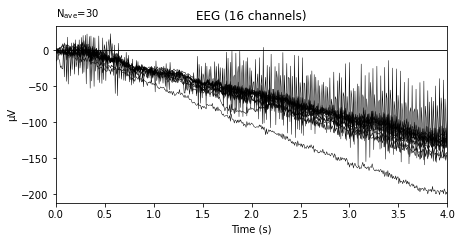

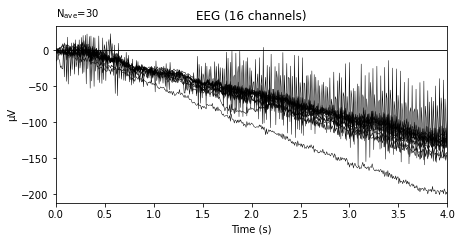

In [47]:
epoch.average().plot()

In [51]:
epoch.info['ch_names']
epoch

Number of events,30
Events,1: 102: 103: 10
Time range,0.000 – 4.000 sec
Baseline,0.000 – 0.000 sec


Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


/var/folders/bq/yr2g0hqx0vqcpvr3lgf609sh0000gn/T/ipykernel_24901/357212041.py:22: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_epochs_image(epoch, [1, 2], sigma=.5,
/var/folders/bq/yr2g0hqx0vqcpvr3lgf609sh0000gn/T/ipykernel_24901/357212041.py:22: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_epochs_image(epoch, [1, 2], sigma=.5,


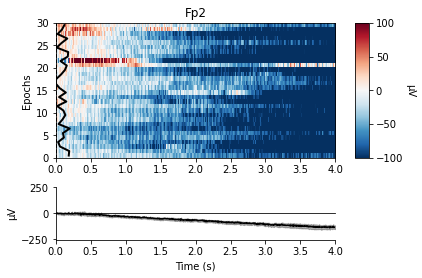

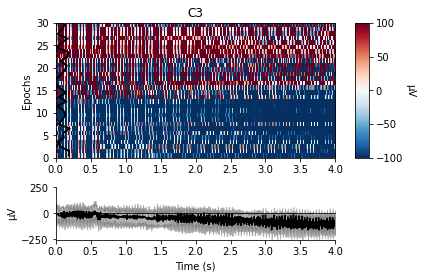

[<Figure size 432x288 with 3 Axes>, <Figure size 432x288 with 3 Axes>]

In [56]:
# and order with spectral reordering
# If you don't have scikit-learn installed set order_func to None
from sklearn.manifold import spectral_embedding  # noqa
from sklearn.metrics.pairwise import rbf_kernel   # noqa


def order_func(times, data):
    this_data = data[:, (times > 0.0) & (times < 0.350)]
    this_data /= np.sqrt(np.sum(this_data ** 2, axis=1))[:, np.newaxis]
    return np.argsort(spectral_embedding(rbf_kernel(this_data, gamma=1.),
                      n_components=1, random_state=0).ravel())


good_pick = 97  # channel with a clear evoked response
bad_pick = 98  # channel with no evoked response

# We'll also plot a sample time onset for each trial
plt_times = np.linspace(0, .2, len(epochs))

plt.close('all')

mne.viz.plot_epochs_image(epoch, [1, 2], sigma=.5,
                          order=order_func, vmin=-100, vmax=100,
                          overlay_times=plt_times, show=True)

In [42]:
freqs = np.arange(5., 60., 3.)
vmin, vmax = -3., 3.  # Define our color limits.

Applying baseline correction (mode: mean)


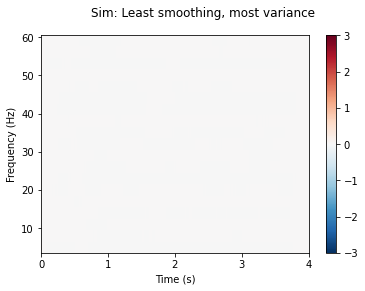

[<Figure size 432x288 with 2 Axes>]

In [43]:
n_cycles = freqs / 2.
time_bandwidth = 2.0  # Least possible frequency-smoothing (1 taper)
power = tfr_multitaper(epoch, freqs=freqs, n_cycles=n_cycles,
                       time_bandwidth=time_bandwidth, return_itc=False)
# Plot results. Baseline correct based on first 100 ms.
power.plot([0], baseline=(0., 0.1), mode='mean', vmin=vmin, vmax=vmax,
           title='Sim: Least smoothing, most variance')

In [57]:
raw = mne.io.read_raw_fif(raw_file)

Opening raw data file ./recordings/2021-12-19--10-05-18_0088/raw.fif...
Isotrak not found
    Range : 0 ... 22494 =      0.000 ...   179.952 secs
Ready.


In [58]:
epoch

Number of events,30
Events,1: 102: 103: 10
Time range,0.000 – 4.000 sec
Baseline,0.000 – 0.000 sec


In [1]:
import os.path as op

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import somato
from mne.baseline import rescale
from mne.stats import bootstrap_confidence_interval

In [2]:

raw_fname = '/Users/gab/Documents/GitHub/BCI4ALS-python/recordings/2021-12-19--10-05-18_0088/raw.fif'

# let's explore some frequency bands
iter_freqs = [
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 45)
]

In [6]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, F8, F3, F4, T7, T8, P3, ...
 chs: 16 EEG, 1 Stimulus
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 17
 projs: []
 sfreq: 125.0 Hz
>

In [8]:
# set epoching parameters
event_id, tmin, tmax = 1, -1., 3.
baseline = None

# get the header to extract events
raw = mne.io.read_raw_fif(raw_fname)
events = mne.find_events(raw, stim_channel='C3')

frequency_map = list()

for band, fmin, fmax in iter_freqs:
    # (re)load the data to save memory
    raw = mne.io.read_raw_fif(raw_fname)
    raw.pick_types( eeg=True)  # we just look at gradiometers
    raw.load_data()

    # bandpass filter
    raw.filter(fmin, fmax, n_jobs=1,  # use more jobs to speed up.
               l_trans_bandwidth=1,  # make sure filter params are the same
               h_trans_bandwidth=1)  # in each band and skip "auto" option.

    # epoch
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline,
                        reject=dict(grad=4000e-13, eog=350e-6),
                        preload=True)
    # remove evoked response
    epochs.subtract_evoked()

    # get analytic signal (envelope)
    epochs.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), epochs.average()))
    del epochs
del raw

Opening raw data file /Users/gab/Documents/GitHub/BCI4ALS-python/recordings/2021-12-19--10-05-18_0088/raw.fif...
Isotrak not found
    Range : 0 ... 22494 =      0.000 ...   179.952 secs
Ready.
Opening raw data file /Users/gab/Documents/GitHub/BCI4ALS-python/recordings/2021-12-19--10-05-18_0088/raw.fif...
Isotrak not found
    Range : 0 ... 22494 =      0.000 ...   179.952 secs
Ready.
Reading 0 ... 22494  =      0.000 ...   179.952 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 413 samples (3.304 sec

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x ** 2, axis=0)


# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, 4))
for ((freq_name, fmin, fmax), average), color, ax in zip(
        frequency_map, colors, axes.ravel()[::-1]):
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(average.data, random_state=0,
                                                  stat_fun=stat_fun)
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')
    ax.set_xlim(-1000, 3000)

axes.ravel()[-1].set_xlabel('Time [ms]')

In [ ]:
raw=

In [9]:
    def filter_data(data: mne.io.RawArray,
                    notch: float, low_pass: float, high_pass: float) -> mne.io.RawArray:

        # data.notch_filter(freqs=notch, verbose=False)
        data.filter(l_freq=low_pass, h_freq=high_pass, verbose=False)

        return data

In [ ]:
data = self.filter_data(data, notch, low_pass, high_pass)

        # Extract features
        features = extract_features(data.get_data()[np.newaxis], self.sfreq,
                                    selected_funcs,
                                    {'pow_freq_bands__freq_bands': np.array([8, 10, 12.5, 30])})

NameError: name 'epochs' is not defined

In [ ]:
iter_freqs = [
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 45)]

